In [0]:
import numpy as np
from matplotlib import pyplot as plt

In [0]:
from CountMinSketch import CountMinSketch

ModuleNotFoundError: ignored

In [0]:
import math
import numpy as np
import hashlib
import json 

In [0]:
class CountMinSketch:
    def __init__(self, eps, delta):
        self.eps = eps
        self.delta = delta
        self.w = math.ceil(np.exp(1) / eps)
        self.d = math.ceil(np.log(1 / delta))
        self.tables = np.zeros((self.d, self.w))
        self.backup = {}

    def compute_hash(self, value, table_no):
        fn = hashlib.md5()
        inp = str(value) + str(0) + str(table_no)
        fn.update(inp.encode())
        out = int(fn.hexdigest(), 16)
        return out % self.w

    def count(self, value):
        if str(value) in self.backup: 
            self.backup[str(value)] = self.backup[str(value)] + 1
        else:
            self.backup[str(value)] = 1
        for i in range(self.d):
            j = self.compute_hash(value, i)
            self.tables[i][j] = self.tables[i][j] + 1

    def estimate(self, value):
        ests = []
        for i in range(self.d):
            j = self.compute_hash(value, i)
            ests.append(self.tables[i][j])
        return min(ests)

    def real_estimate(self, value):
        if str(value) in self.backup: return self.backup[str(value)]
        return -1

    def compute_size(self):
        size = 0
        for key in self.backup:
            size += abs(self.backup[key])
        return size

    def save_counts(self, count_filename='counts.txt', actual_filename='backups.txt'):
        np.savetxt(count_filename, self.tables)
        with open(actual_filename, 'w') as fp: json.dump(self.backup, fp)

    def load_counts(self, count_filename='counts.txt', actual_filename='backups.txt'):
        with open(actual_filename, 'r') as fp: 
            temp = json.load(fp)
            self.backup = temp
        self.tables = np.loadtxt(count_filename)

In [0]:
cms = CountMinSketch(0.03, 0.05)
for i in range(1, 100):
  cms.count(i)
  cms.count(i)
print(cms.backup)

{'1': 2, '2': 2, '3': 2, '4': 2, '5': 2, '6': 2, '7': 2, '8': 2, '9': 2, '10': 2, '11': 2, '12': 2, '13': 2, '14': 2, '15': 2, '16': 2, '17': 2, '18': 2, '19': 2, '20': 2, '21': 2, '22': 2, '23': 2, '24': 2, '25': 2, '26': 2, '27': 2, '28': 2, '29': 2, '30': 2, '31': 2, '32': 2, '33': 2, '34': 2, '35': 2, '36': 2, '37': 2, '38': 2, '39': 2, '40': 2, '41': 2, '42': 2, '43': 2, '44': 2, '45': 2, '46': 2, '47': 2, '48': 2, '49': 2, '50': 2, '51': 2, '52': 2, '53': 2, '54': 2, '55': 2, '56': 2, '57': 2, '58': 2, '59': 2, '60': 2, '61': 2, '62': 2, '63': 2, '64': 2, '65': 2, '66': 2, '67': 2, '68': 2, '69': 2, '70': 2, '71': 2, '72': 2, '73': 2, '74': 2, '75': 2, '76': 2, '77': 2, '78': 2, '79': 2, '80': 2, '81': 2, '82': 2, '83': 2, '84': 2, '85': 2, '86': 2, '87': 2, '88': 2, '89': 2, '90': 2, '91': 2, '92': 2, '93': 2, '94': 2, '95': 2, '96': 2, '97': 2, '98': 2, '99': 2}


In [0]:
import scipy.stats as stats

In [0]:
def generate_sample(n=1000, dist='uniform', loc=0, scale=10000, lambda_=5, s=1):
  if dist == 'uniform':
    float_sample = stats.uniform.rvs(loc, scale, n)
    return [int(el) for el in float_sample]
  if dist == 'zipf':
    float_sample = stats.zipf.rvs(a, size=n)
    return [int(el) for el in float_sample]
  if dist == 'exp':
    float_sample = planck.rvs(lambda_, size=n)
    return [int(el) for el in float_sample]
  if dist == 'lognorm':
    float_sample = lognorm.rvs(s=s, size=n)
    return [int(el) for el in float_sample]
  if dist == 'geometric':
    float_sample =  geom.rvs(p, size=n)
    return [int(el) for el in float_sample]
  elif dist == 'normal':
    float_sample = stats.norm.rvs(loc, scale, n)
    return [int(el) for el in float_sample]
  else:
    return -1

In [0]:
cms = CountMinSketch(0.03, 0.5)

In [0]:
uniform_sample = generate_sample()
for el in uniform_sample:
  cms.count(el)

In [0]:
def compute_error_prob(cms, data, n):
  err = []
  for el in data:
    err.append(cms.estimate(el) - cms.real_estimate(el))
  avg_err = sum(err) / len(err)
  max_err = max(err)
  exceed = 0
  for el in err:
    if el > cms.eps * n:
      exceed += 1
  return exceed / len(err), err

In [0]:
def load_data(cms, data):
  for el in data:
    cms.count(el)

In [0]:
def run_experiment():
  n = 1000
  eps = 0.01
  min_delta = 0.01
  max_delta = 0.1
  deltas = np.linspace(min_delta, max_delta, 10).tolist()
  # deltas = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
  ps = []
  for delta in deltas:
    probs = 0
    for i in range(3):
      cms = CountMinSketch(eps, delta)
      print(cms.w)
      dt = generate_sample(n)
      load_data(cms, dt)
      p, err = compute_error_prob(cms, dt, n)
      print(err)
      probs += p
    probs /= 3
    ps.append(probs)
  return deltas, ps, err



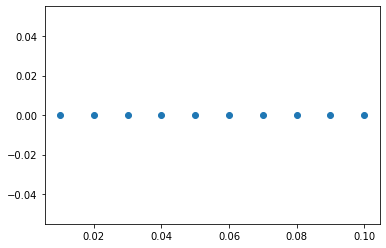

In [0]:
# VISUALIZE ERROR PROBABILITY VS DELTA

# compute empirical probability of error exceeding the threshold
def compute_error_prob(cms, data, n):
  err = []
  for el in data:
    err.append(cms.estimate(el) - cms.real_estimate(el))
  avg_err = sum(err) / len(err)
  max_err = max(err)
  exceed = 0
  for el in err:
    if el > cms.eps * n:
      exceed += 1
  p = exceed / len(err)
  return p, avg_err, max_err, err

# run experiments on 10 values of delta interpolated between (min_delta, max_delta) and compute array of corresponding error probabilities
def error_prob_vs_delta(n=100000, eps=0.4, min_delta=0.01, max_delta=0.1):
  deltas = np.linspace(min_delta, max_delta, 10).tolist()
  # deltas = [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1]
  ps = []
  for delta in deltas:
    probs = 0
    # Average probabilities across 3 trials
    for i in range(3):
      cms = CountMinSketch(eps, delta)
      dt = generate_sample(n)
      load_data(cms, dt)
      p, avg_err, max_err, err = compute_error_prob(cms, dt, n)
      probs += p
    probs /= 3
    ps.append(probs)
  return deltas, ps

# graphing helper function
def graph_error_prob_vs_delta(deltas, ps, filename="p_vs_delta.png"):
  plt.scatter(deltas, ps)
  plt.show()

# actual code to run experiment:
deltas, ps = error_prob_vs_delta()
graph_error_prob_vs_delta(deltas, ps)

Average Error: 2.061
Maximum Error: 7.0
Acceptable Threshold: 10.0
Proportion of Errors Exceeding Threshold: 0.0


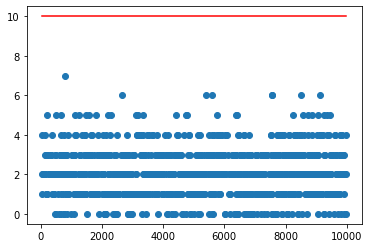

In [0]:
# VISUALIZE HOW ERROR DISTRIBUTION CHANGES WITH EPS, DELTA, N ON UNIFORM DATA
eps = 0.01
delta = 0.05
n = 1000
threshold = eps * n
sample = generate_sample(n=n)

cms = CountMinSketch(eps, delta)
load_data(cms, sample)

p, avg_err, max_err, err = compute_error_prob(cms, sample, n)

print("Average Error: " + str(avg_err))
print("Maximum Error: " + str(max_err))
print("Acceptable Threshold: " + str(threshold))
print("Proportion of Errors Exceeding Threshold: " + str(p))

plt.scatter(sample, err)
plt.plot([min(sample), max(sample)], [threshold, threshold], color='red')
plt.show()

Average Error: 2.172
Maximum Error: 6.0
Acceptable Threshold: 10.0
Proportion of Errors Exceeding Threshold: 0.0


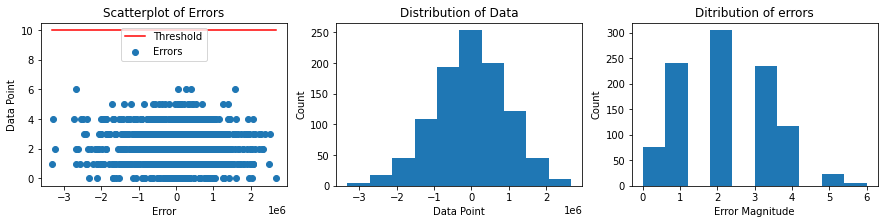

In [0]:
# VISUALIZE HOW ERROR CHANGES BY COMPRESSING THE NORMAL DISTRIBUTION
eps = 0.01
delta = 0.05
n = 1000
threshold = eps * n

mean = 0
sd = 1000000 
sample = generate_sample(n=n, dist='normal', loc=mean, scale=sd)

cms = CountMinSketch(eps, delta)
load_data(cms, sample)

p, avg_err, max_err, err = compute_error_prob(cms, sample, n)

print("Average Error: " + str(avg_err))
print("Maximum Error: " + str(max_err))
print("Acceptable Threshold: " + str(threshold))
print("Proportion of Errors Exceeding Threshold: " + str(p))

fig, (f1, f2, f3) = plt.subplots(1,3)
fig.set_size_inches(15, 3)

f1.scatter(sample, err, label="Errors")
f1.plot([min(sample), max(sample)], [threshold, threshold], color='red', label="Threshold")
f1.legend()
f1.title.set_text("Scatterplot of Errors")
f1.set(xlabel="Error", ylabel="Data Point")
f2.hist(sample)
f2.title.set_text("Distribution of Data")
f2.set(ylabel="Count", xlabel="Data Point")
f3.hist(err)
f3.title.set_text("Ditribution of errors")
f3.set(ylabel="Count", xlabel="Error Magnitude")
fig.show()

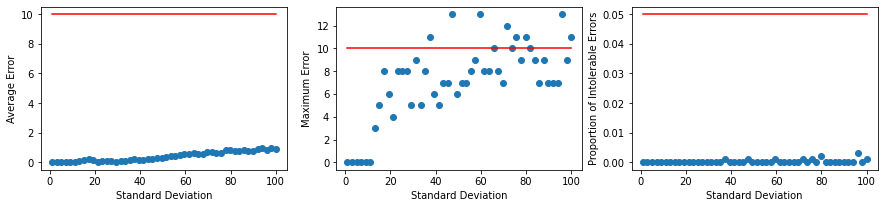

In [0]:
# Plot Average Error vs. SD
eps = 0.01
delta = 0.05
n = 1000
threshold = eps * n

mean=0
min_sd=1
max_sd=100

def error_vs_sd(eps=0.01, delta=0.05, n=1000, mean=0, min_sd=50, max_sd=500):
  sds = np.linspace(min_sd, max_sd).tolist()
  avgs = []
  maxs = []
  ps = []

  for sd in sds:
    sample = generate_sample(n=1000, dist='normal', loc=mean, scale=sd)
    cms = CountMinSketch(eps, delta)
    load_data(cms, sample)
    p, avg_err, max_err, err = compute_error_prob(cms, sample, n)
    avgs.append(avg_err)
    maxs.append(max_err)
    ps.append(p)
  
  threshold = eps * n
  return sds, avgs, maxs, ps, threshold

# actual code
sds, avgs, maxs, ps, threshold = error_vs_sd(eps, delta, n, mean, min_sd, max_sd)
fig, (f1, f2, f3) = plt.subplots(1, 3)
fig.set_size_inches(15, 3)
f1.scatter(sds, avgs)
f1.plot([min(sds), max(sds)], [threshold, threshold], color='red')
f1.set(xlabel="Standard Deviation", ylabel="Average Error")
f2.scatter(sds, maxs)
f2.plot([min(sds), max(sds)], [threshold, threshold], color='red')
f2.set(ylabel="Maximum Error", xlabel="Standard Deviation")
f3.scatter(sds, ps)
f3.plot([min(sds), max(sds)], [delta, delta], color='red')
f3.set(ylabel="Proportion of Intolerable Errors", xlabel="Standard Deviation")
plt.show()
